## Trabajo 02 Renta fija Sql y python - Laura Rojas - Edwin Rios

#### Librerias

In [137]:
import mysql.connector
import datetime as dt
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt


In [138]:
import os
import sys
import inspect

In [139]:
import Clase_6.Funciones as funciones
from Clase_6.Funciones import DB_class
import Clase_6.Clase_6Fun as clase_6Fun

--funciones\
    |-DB_class\
    |-coupon_m(parametros)\
    |-discount_factor_m(parametros)\
    |-dirty_price_m(parametros)\
    |-dirty_price_1i(parametros,inst_pos)\
    |-ytm_1d_obj_func(x,i,params,prices)\
    |-find_ytm_loop(parametros,prices)\
    |-ytm_obj_func(x,params,prices)\
    |-find_ytm_m(parametros,prices)\
    |-NelsonSiegel_1d(params, ven)\
    |-NelsonSiegel_m(params, ven)\
    |-dirty_price_m_ns(betas,parametros)\
    |-objetive_function(betas,parametros)\
    |-betas_optimization(parametros)\
    |-betas_optimization_bound(parametros)\

--Clase_6Fun\
    |-Macaulay_duration_mat(parametros,prices)\
    |-Modified_duration_mat(parametros,prices)\
    |-Modified_duration_mat_2(parametros,prices,macaulay_duration)\
    |-Convexity_mat(parametros,prices)\
    |-Macaulay_duration_mat_loop(parametros,prices)\
    |-Modified_duration_mat_loop(parametros,prices)\
    |-Modified_duration_mat_loop_2(parametros,prices,macaulay_duration)\
    |-Convexity_mat_loop(parametros,prices)\
    |-objetive_function_prices(betas,parametros)\
    |-betas_optimization_bound_prices(parametros)\

In [140]:
import itertools
import importlib

#### Inclusión desde base de datos

In [141]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class2_db = db_object.open_db()
mi_cursor = class2_db.cursor()
query = ("SELECT * FROM trabajo_2.tabla_precios WHERE trabajo_2.tabla_precios.frecuencia_pago=1 "+\
    "order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo")
tes_faciales = pd.read_sql(query, con=class2_db)
display(tes_faciales)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tipo,Indice_tipo,fecha_valoracion,nemotecnico,fecha_emision,fecha_vencimiento,cupon,tir,frecuencia_pago,Indicador_indexado,conteo_dias,precio_sucio,duracion_mac,duracion_mod,Convexidad
0,T4,1,2022-09-18,CDTTGSS1V,2021-12-27,2022-09-27,7.1,4.538834,1,No,REAL/365,0.0,0.0,0.0,0.0
1,T4,2,2022-09-18,CDTAQCS1V,2021-09-28,2022-09-28,8.1,4.540110,1,No,REAL/365,0.0,0.0,0.0,0.0
2,T4,3,2022-09-18,CDTJXZS1V,2022-06-28,2022-09-28,6.1,4.540110,1,No,REAL/365,0.0,0.0,0.0,0.0
3,T4,4,2022-09-18,CDTFYMS1V,2022-03-29,2022-09-29,6.1,4.541385,1,No,REAL/365,0.0,0.0,0.0,0.0
4,T4,5,2022-09-18,CDTEGLS1V,2021-09-29,2022-09-29,6.1,4.541385,1,No,REAL/365,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,T4,96,2022-09-18,CDTAZMS1V,2022-06-07,2025-06-07,6.1,5.606767,1,No,REAL/365,0.0,0.0,0.0,0.0
96,T4,97,2022-09-18,CDTZVBS1V,2022-06-15,2025-06-15,7.1,5.614064,1,No,REAL/365,0.0,0.0,0.0,0.0
97,T4,98,2022-09-18,CDTBVTS1V,2022-09-09,2025-09-09,6.1,5.691255,1,No,REAL/365,0.0,0.0,0.0,0.0
98,T4,99,2022-09-18,CDTFVBS1V,2022-09-09,2025-09-09,7.1,5.691255,1,No,REAL/365,0.0,0.0,0.0,0.0


In [143]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class2_db = db_object.open_db()
mi_cursor = class2_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T1\',\'T4\',\'T5\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class2_db)
display(tes_faciales)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tipo,Indice_tipo,fecha_valoracion,nemotecnico,fecha_emision,fecha_vencimiento,cupon,tir,frecuencia_pago,Indicador_indexado,conteo_dias,Indice_c,fecha_indice,valor
0,T1,1,2022-09-20,CDTOCSS6V,2012-04-12,2023-04-12,6.0,4.021916,6,No,REAL/365,No,2022-09-20,0.0
1,T1,2,2022-09-20,CDTGEDS6V,2012-08-26,2023-08-26,6.0,4.760056,6,No,REAL/365,No,2022-09-20,0.0
2,T1,3,2022-09-20,CDTDXAS6V,2012-05-15,2024-05-15,6.0,5.905344,6,No,REAL/365,No,2022-09-20,0.0
3,T1,4,2022-09-20,CDTVFTS6V,2012-07-24,2024-07-24,7.0,6.157886,6,No,REAL/365,No,2022-09-20,0.0
4,T1,5,2022-09-20,CDTAOFS6V,2014-12-20,2024-12-20,5.0,6.634711,6,No,REAL/365,No,2022-09-20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,T5,96,2022-09-18,TUVTZT360,2021-02-13,2050-02-13,3.0,9.828134,12,No,REAL/360,No,2022-09-18,0.0
296,T5,97,2022-09-18,TUVTYO360,2017-09-04,2050-09-04,3.0,9.843179,12,No,REAL/360,No,2022-09-18,0.0
297,T5,98,2022-09-18,TUVTXV360,2015-06-16,2050-06-16,5.0,9.837320,12,No,REAL/360,No,2022-09-18,0.0
298,T5,99,2022-09-18,TUVTHB360,2020-11-19,2050-11-19,5.0,9.848664,12,No,REAL/360,No,2022-09-18,0.0


In [144]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir.copy()
frec_pag=tes_faciales.frecuencia_pago
indicador=tes_faciales.valor
conteo_dias=tes_faciales.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100

discount_rates_consol=tes_faciales.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]


In [145]:
### titulos
mul_inst = 1 #intentar 1, 100 y 10000
parametros = dict({
        'val_date':val_date, 
        'ini_date':np.tile(ini_date,mul_inst), 
        'fin_date':np.tile(fin_date,mul_inst), 
        'coupon':np.tile(cpn,mul_inst),
        'discount_rates':np.tile(discount_rates_consol,mul_inst),
        'conteo_dias':np.tile(conteo_dias,mul_inst),
        'frec_pag':np.tile(frec_pag,mul_inst),
        'indicador':np.tile(indicador,mul_inst),
        'limits':np.array([-20,20])
        })

In [174]:
importlib.reload(funciones)

<module 'Clase_6.Funciones' from 'd:\\cursos\\Maestria finanzas\\S3_PySql rent fij\\Trabajo02\\Clase_6\\Funciones.py'>

In [175]:
n_inst = len(parametros['coupon'])
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_mGen(parametros)
parametros['cpn_dict'] = coupon_dict

parametros['delta_t'] = coupon_dict['days_matrix']
parametros['discount_factors'] = funciones.discount_factor_m(parametros)

prices = funciones.dirty_price_m(parametros)


In [176]:
import time
ini_0 = time.time()
mac_dur_m = clase_6Fun.Macaulay_duration_mat(parametros,prices).round(15)
ini_1 = time.time()
mod_dur_m_2 = clase_6Fun.Modified_duration_mat_2(parametros,prices,mac_dur_m).round(15)
fin_0 = time.time()
conv_m = clase_6Fun.Convexity_mat(parametros,prices).round(15)

In [177]:
ini_2 = time.time()
mac_dur_m_loop = clase_6Fun.Macaulay_duration_mat_loop(parametros,prices).round(15)
ini_3 = time.time()
mod_dur_m_loop_2 = clase_6Fun.Modified_duration_mat_loop_2(parametros,prices,mac_dur_m_loop).round(15)
ini_4 = time.time()
conv_m_loop = clase_6Fun.Convexity_mat_loop(parametros,prices).round(15)
fin_1 = time.time()

In [178]:
(mac_dur_m==mac_dur_m_loop).all()
(mod_dur_m_2 == mod_dur_m_loop_2).all()
(conv_m == conv_m_loop).all()

False

In [179]:
print(f'El calculo de duracion macaulay matricial para {n_inst} titulos, tardo {(ini_1-ini_0):.2f} segundos')
print(f'El calculo de duracion macaulay vect en loop para  {n_inst} titulos, tardo {(ini_3-ini_2):.2f} segundos')

print(f'El calculo de duracion modificada matricial para {n_inst} titulos,  tardo {(fin_0-ini_1):.2f} segundos')
print(f'El calculo de duracion modificada vect en loop para {n_inst} titulos, tardo {(ini_4-ini_3):.2f} segundos')

print(f'El calculo de la convexidad matricial para {n_inst} titulos, tardo {(ini_2-fin_0):.2f} segundos')
print(f'El calculo de la convexidad vect en loop para {n_inst} titulos, tardo {(fin_1-ini_4):.2f} segundos')


El calculo de duracion macaulay matricial para 300 titulos, tardo 0.01 segundos
El calculo de duracion macaulay vect en loop para  300 titulos, tardo 0.01 segundos
El calculo de duracion modificada matricial para 300 titulos,  tardo 0.00 segundos
El calculo de duracion modificada vect en loop para 300 titulos, tardo 0.00 segundos
El calculo de la convexidad matricial para 300 titulos, tardo 2.26 segundos
El calculo de la convexidad vect en loop para 300 titulos, tardo 0.01 segundos


In [181]:
import matplotlib.pyplot as plt
import os

In [122]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class6_db = db_object.open_db()
mi_cursor = class6_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.frecuencia_pago=12 and trabajo_2.tabla_indices.Indice_c=\'No\' '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class6_db)



C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [123]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir

In [124]:
parametros = dict({
        'val_date':val_date, 
        'ini_date':ini_date, 
        'fin_date':fin_date, 
        'coupon':cpn,
        'discount_rates': discount_rates,
        'limits':np.array([0,200])
        })


In [125]:
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_m(parametros)
parametros['cpn_dict'] = coupon_dict
parametros['delta_t'] = coupon_dict['days_matrix']/365
parametros['mkt_prices'] = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']/365

In [126]:
################ Optimizacion por precios
parametros['limits'] = np.array([0,200])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:477: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:478: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:479: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 44.57 segundos


In [128]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:332: RuntimeWarning: invalid value encountered in power
  disc = (1/(1+d_r/100)**delta_t).T


6.736960713554707

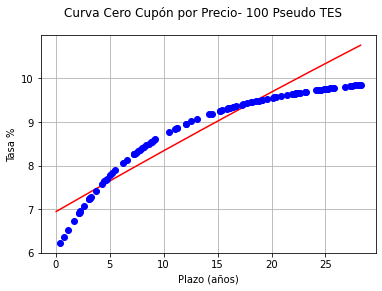

In [129]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()

In [191]:
db_object = DB_class(host="localhost",user="root",password="root",database="trabajo_1")
class2_db = db_object.open_db()
mi_cursor = class2_db.cursor()
query = (
'SELECT '+\
'trabajo_2.tabla_precios.Tipo,'+\
'trabajo_2.tabla_precios.Indice_tipo,'+\
'trabajo_2.tabla_precios.fecha_valoracion,'+\
'trabajo_2.tabla_precios.nemotecnico,'+\
'trabajo_2.tabla_precios.fecha_emision,'+\
'trabajo_2.tabla_precios.fecha_vencimiento,'+\
'trabajo_2.tabla_precios.cupon,'+\
'trabajo_2.tabla_precios.tir,'+\
'trabajo_2.tabla_precios.frecuencia_pago,'+\
'trabajo_2.tabla_precios.Indicador_indexado,'+\
'trabajo_2.tabla_precios.conteo_dias,'+\
'trabajo_2.tabla_indices.Indice_c,'+\
'trabajo_2.tabla_indices.fecha_indice,'+\
'trabajo_2.tabla_indices.valor '+\
'FROM trabajo_2.tabla_precios '+\
'left join trabajo_2.tabla_indices '+\
'on '+\
'concat(trabajo_2.tabla_indices.Indice_c,trabajo_2.tabla_indices.fecha_indice) ='+\
'concat(trabajo_2.tabla_precios.Indicador_indexado,trabajo_2.tabla_precios.fecha_valoracion) '+\
'where '+\
'trabajo_2.tabla_precios.Tipo in (\'T2\') '+\
'order by trabajo_2.tabla_precios.Tipo, trabajo_2.tabla_precios.Indice_tipo'
)
tes_faciales = pd.read_sql(query, con=class2_db)
display(tes_faciales)

C:\Users\Edwin\AppData\Roaming\Python\Python39\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tipo,Indice_tipo,fecha_valoracion,nemotecnico,fecha_emision,fecha_vencimiento,cupon,tir,frecuencia_pago,Indicador_indexado,conteo_dias,Indice_c,fecha_indice,valor
0,T2,1,2022-09-18,CDTWDF90,2012-09-11,2022-10-12,4.02,2.160716,12,IPC,REAL/365,IPC,2022-09-18,10.84
1,T2,2,2022-09-18,CDTRZF90,2020-09-11,2022-12-12,2.15,2.533970,12,IPC,REAL/365,IPC,2022-09-18,10.84
2,T2,3,2022-09-18,CDTRDW90,2018-01-18,2023-01-18,2.90,2.747923,12,IPC,REAL/365,IPC,2022-09-18,10.84
3,T2,4,2022-09-18,CDTCNP90,2021-01-22,2023-01-22,0.65,2.770512,12,IPC,REAL/365,IPC,2022-09-18,10.84
4,T2,5,2022-09-18,CDTKVM90,2021-07-22,2023-01-22,0.50,2.770512,12,IPC,REAL/365,IPC,2022-09-18,10.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,T2,96,2022-09-18,CDTGCN90,2018-09-26,2043-09-26,4.12,7.884695,12,IPC,REAL/365,IPC,2022-09-18,10.84
96,T2,97,2022-09-18,CDTPAA90,2018-10-19,2043-10-19,4.11,7.885051,12,IPC,REAL/365,IPC,2022-09-18,10.84
97,T2,98,2022-09-18,CDTFIK90,2018-11-16,2043-11-16,4.11,7.885482,12,IPC,REAL/365,IPC,2022-09-18,10.84
98,T2,99,2022-09-18,CDTVQT90,2018-03-07,2044-03-07,4.10,7.887171,12,IPC,REAL/365,IPC,2022-09-18,10.84


In [192]:
val_date= tes_faciales.fecha_valoracion.drop_duplicates()[0]
ini_date = tes_faciales.fecha_emision
fin_date = tes_faciales.fecha_vencimiento
cpn =  tes_faciales.cupon
discount_rates = tes_faciales.tir.copy()
frec_pag=tes_faciales.frecuencia_pago
indicador=tes_faciales.valor
conteo_dias=tes_faciales.conteo_dias
discount_rates_ind=((1+discount_rates/100)*(1+indicador/100)-1)*100

discount_rates_consol=tes_faciales.tir.copy()
for i in range(len(discount_rates)):
    if indicador[i]==0:
        discount_rates_consol[i]=discount_rates[i]
    else:
        discount_rates_consol[i]=discount_rates_ind[i]

In [193]:
mul_inst = 1 #intentar 1, 100 y 10000
parametros = dict({
        'val_date':val_date, 
        'ini_date':np.tile(ini_date,mul_inst), 
        'fin_date':np.tile(fin_date,mul_inst), 
        'coupon':np.tile(cpn,mul_inst),
        'discount_rates':np.tile(discount_rates_consol,mul_inst),
        'conteo_dias':np.tile(conteo_dias,mul_inst),
        'frec_pag':np.tile(frec_pag,mul_inst),
        'indicador':np.tile(indicador,mul_inst),
        'limits':np.array([-20,20])
        })

In [194]:
n_inst = len(parametros['coupon'])
## Funcion de matriz de cupones
coupon_dict = funciones.coupon_mGen(parametros)
parametros['cpn_dict'] = coupon_dict

parametros['delta_t'] = coupon_dict['days_matrix']
parametros['discount_factors'] = funciones.discount_factor_m(parametros)
parametros['mkt_prices']  = funciones.dirty_price_m(parametros)

##### Calcular los betas
venc = coupon_dict['days_matrix']

In [198]:
################ Optimizacion por precios
parametros['limits'] = np.array([0,400])
ini = time.time()
optimiz_result = clase_6Fun.betas_optimization_bound_prices(parametros)
fin = time.time()
betas_opt = optimiz_result.copy()
curva = funciones.NelsonSiegel_m(betas_opt, venc)
print(f'El algortimo de optimizacion por fuerza bruta en Precio tarda {(fin-ini):.2f} segundos')
#se demora menos de un min

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:584: RuntimeWarning: divide by zero encountered in true_divide
  y = beta_0+params[1]*((1-np.exp(-ven/params[3]))/(ven/params[3]))+\
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:585: RuntimeWarning: divide by zero encountered in true_divide
  params[2]*((1-np.exp(-ven/params[3]))/(ven/params[3])- \
d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:586: RuntimeWarning: divide by zero encountered in true_divide
  np.exp(-ven/params[3]))


El algortimo de optimizacion por fuerza bruta en Precio tarda 34.16 segundos


In [199]:
#Evaluar los precios, las TIRs y la funcion objetivo 
prices_opt = funciones.dirty_price_m_ns(betas_opt,parametros)
tirs_opt = funciones.find_ytm_loop(parametros,prices_opt)
funciones.find_ytm_loop(parametros,prices_opt)
clase_6Fun.objetive_function_prices(betas_opt,parametros)
funciones.objetive_function(betas_opt,parametros)

d:\cursos\Maestria finanzas\S3_PySql rent fij\Trabajo02\Clase_6\Funciones.py:439: RuntimeWarning: invalid value encountered in power
  disc = (1/(1+d_r/100)**delta_t).T


1632.505846856149

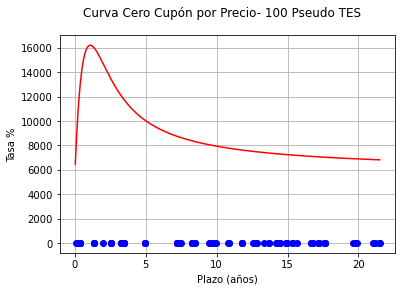

In [200]:
###Grafica
y_term = [(fin_date[k]-val_date).days/365 for k in range(len(fin_date))]
plt.plot(venc.T, curva*100,'r')
plt.plot(np.array(y_term), np.array(discount_rates),'bo')
plt.grid(True)
plt.ylabel('Tasa %')
plt.xlabel('Plazo (años)')
plt.suptitle('Curva Cero Cupón por Precio- 100 Pseudo TES')
#plt.savefig(cwd+'\\Clase_6\\N&S-Price_Opt.png')
plt.show()

In [120]:
tes_faciales.fecha_emision[0]
issue=dt.datetime.strptime(str(tes_faciales.fecha_emision[0]),'%Y-%m-%d').date()
periodos=10
frecuencia_0=3
years_0=0
months_0=0
arr = np.array([])
for i in range(periodos):
    if i==0:
        years_0=0
    elif (frecuencia_0*i)%12==0:
        years_0=(frecuencia_0*i)/12
    months_0=(frecuencia_0*i)%12
    
    respuesta=issue + relativedelta(years=years_0) +relativedelta(months=months_0) 
    arr = np.append(arr, respuesta)    
    #print(years_0,' - ',months_0,' - ',respuesta)
print(arr)

[datetime.date(2012, 9, 11) datetime.date(2012, 12, 11)
 datetime.date(2013, 3, 11) datetime.date(2013, 6, 11)
 datetime.date(2013, 9, 11) datetime.date(2013, 12, 11)
 datetime.date(2014, 3, 11) datetime.date(2014, 6, 11)
 datetime.date(2014, 9, 11) datetime.date(2014, 12, 11)]
